# 2.6.3 Regresión

**Gaussiana condicional:** $\quad p(y\mid \boldsymbol{x};\boldsymbol{\theta})=\mathcal{N}(y\mid f_{\boldsymbol{\mu}}(\boldsymbol{x};\boldsymbol{\theta}), f_{\sigma}(\boldsymbol{x};\boldsymbol{\theta})^2)$

**Regresión homocedástica:** $\;$ Gaussiana condicional con $\;f_{\sigma}(\boldsymbol{x};\boldsymbol{\theta})^2=\sigma^2\;$ fija

**Regresión (homocedástica) lineal:** $\;$ regresión homocedástica de media lineal con la entrada, $\,p(y\mid \boldsymbol{x};\boldsymbol{\theta})=\mathcal{N}(y\mid \boldsymbol{w}^t\boldsymbol{x}+b, \sigma^2)$

**Regresión heterocedástica lineal:** $\;$ Gaussiana condicional de media y $\sigma$ lineales con la entrada, $\,p(y\mid \boldsymbol{x};\boldsymbol{\theta})=\mathcal{N}(y\mid \boldsymbol{w}_{\mu}^t\boldsymbol{x}+b, \sigma_+(\boldsymbol{w}_{\sigma}^t\boldsymbol{x})^2)$

**Ejemplo 2d:** $\;\boldsymbol{x}\in[-1, 1]^2,\,\boldsymbol{w}_{\mu}=(0, 2)^t,\,b=0,\,\boldsymbol{w}_{\sigma}=(2, 0)$

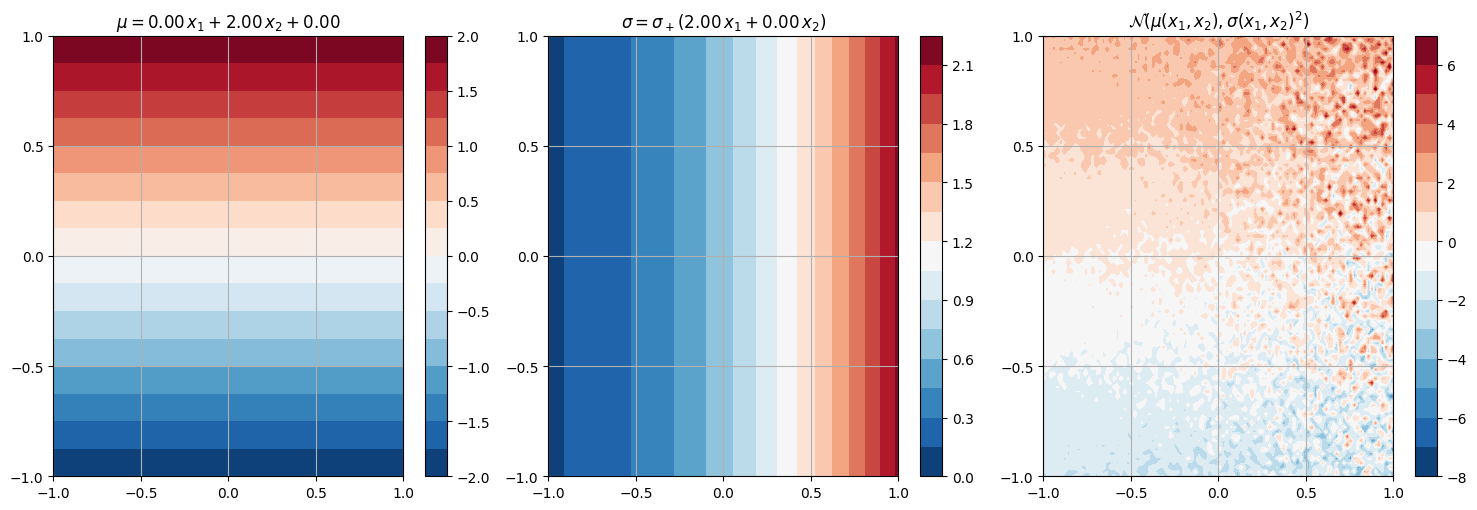

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import norm
x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
X = np.c_[np.ravel(x1), np.ravel(x2)]; wmu = np.array([0, 2]); b = 0; wsigma = np.array([2, 0]);
mu = X @ wmu + b; sigma = np.log1p(np.exp(X @ wsigma))
fig, axs = plt.subplots(1, 3, figsize=(15, 5)); fig.tight_layout()
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(-1, 1, 5)); ax.set_yticks(np.linspace(-1, 1, 5)); ax.grid();
ax = axs[0]; ax.set_title('$\mu={:.2f}\,x_1{:+.2f}\,x_2{:+.2f}$'.format(wmu[0], wmu[1], b))
cp = ax.contourf(x1, x2, mu.reshape(x1.shape), 15, cmap='RdBu_r'); plt.colorbar(cp, ax=ax);
ax = axs[1]; ax.set_title('$\sigma=\sigma_+({:.2f}\,x_1{:+.2f}\,x_2)$'.format(wsigma[0], wsigma[1]))
cp = ax.contourf(x1, x2, sigma.reshape(x1.shape), 15, cmap='RdBu_r'); plt.colorbar(cp, ax=ax);
rvs = norm().rvs(mu.shape) * sigma + mu # a random number at each position
ax = axs[2]; ax.set_title('$\mathcal{N}(\mu(x_1, x_2),\sigma(x_1, x_2)^2)$')
cp = ax.contourf(x1, x2, rvs.reshape(x1.shape), 15, cmap='RdBu_r'); plt.colorbar(cp, ax=ax);